# Initial Review

In [2]:
import pandas as pd
import os
os.chdir(r'C:\Users\jettc\OneDrive\Desktop\Important Info\Interview Prep\Michaels')
df = pd.read_excel("Data/Dataset for Technical Interview 1.xlsx")
df.head(15)


,KEY,ATTRIBUTE_1,ATTRIBUTE_2,ATTRIBUTE_3,ATTRIBUTE_4,METRIC_1,METRIC_2,METRIC_3,METRIC_4,METRIC_5,METRIC_6,METRIC_7,METRIC_8,METRIC_9,METRIC_10
0,11011103400,0,A10,GROUP_40,GROUP_4,2.728756,0.29,432.64,5.131859,0.140,0.023,0.005,0.375,4.29,0.14
1,11011107800,0,A10,GROUP_17,GROUP_4,1.695245,0.20,231.04,2.089312,0.122,0.011,0.006,0.383,4.73,0.43
2,11012586200,0,A5,GROUP_4,GROUP_1,7.344042,0.36,7.84,1.174322,0.337,0.016,0.006,0.485,2.86,0.28
3,11012587300,0,A5,GROUP_4,GROUP_1,8.537440,0.20,25.00,3.307853,0.478,0.015,0.009,0.487,7.27,0.18
4,11013299000,0,A10,GROUP_40,GROUP_4,1.995968,0.37,64.00,1.034488,0.090,0.016,0.003,0.400,3.47,0.37
5,11013301200,0,A10,GROUP_40,GROUP_4,2.649735,0.30,100.00,2.638334,0.135,0.009,0.004,0.367,4.65,0.19
6,11013885300,0,A10,GROUP_17,GROUP_4,4.175926,0.53,127.69,2.784078,0.121,0.011,0.005,0.302,5.19,0.47
7,11016886100,0,AA9,GROUP_55,GROUP_1,1.169856,0.15,412.09,1.146019,0.042,0.201,0.015,0.411,5.62,0.00
8,11016888300,0,AA9,GROUP_55,GROUP_1,1.111665,0.16,372.49,0.618085,0.040,0.175,0.013,0.398,4.97,0.00
9,11016891600,0,AA9,GROUP_55,GROUP_1,0.416137,0.18,285.61,1.369450,0.039,0.206,0.011,0.423,4.23,0.09


In [3]:
df.dtypes

KEY              int64
ATTRIBUTE_1      int64
ATTRIBUTE_2     object
ATTRIBUTE_3     object
ATTRIBUTE_4     object
METRIC_1       float64
METRIC_2       float64
METRIC_3       float64
METRIC_4       float64
METRIC_5       float64
METRIC_6       float64
METRIC_7       float64
METRIC_8       float64
METRIC_9       float64
METRIC_10      float64
dtype: object

In [4]:
df['ATTRIBUTE_2'].value_counts().head(10)

ATTRIBUTE_2
AA4     110
AA7     110
AA6     108
AA1     108
AA8     106
AA5     105
AA14    104
A11     104
AA15    102
AA2     100
Name: count, dtype: int64

In [5]:
df['ATTRIBUTE_3'].value_counts().head(10)

ATTRIBUTE_3
GROUP_2     267
GROUP_61    215
GROUP_42    108
GROUP_15    108
GROUP_13    100
GROUP_76    100
GROUP_20     99
GROUP_3      80
GROUP_51     75
GROUP_57     75
Name: count, dtype: int64

At an initial viewing of the dataset, we see that there is a combination of Enumerators, Percentages, and what appears to be financial amounts. Additional considerations have been made for large and small financial amounts (Ex METRIC_1, METRIC_3, METRIC_4). I have created a data dictionary in Google Sheets to be used for our analysis. Therefore, the following steps will be based on these assumptions. 

In [6]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns

dict_df = pd.read_csv("michaels_data_dict.csv", quotechar='"')
display(dict_df)


,Raw Column,Data Type,Imputed Columns,Imputed Description,notes / examples
0,KEY,int,KEY,"Unique identifier for each record, primary key.",pk
1,ATTRIBUTE_1,enum,promotion_TF,Binary flag for promotion/status,0 or 1
2,ATTRIBUTE_2,enum,product_category,Product category or SKU group,"A5, A10, AA9, A11, AA14"
3,ATTRIBUTE_3,enum,region,"Store region, sales territory, or operational ...","GROUP_4, GROUP_40, GROUP_55"
4,ATTRIBUTE_4,enum,tier,Functional segmentation such as marketing clus...,"GROUP_1, GROUP_4, GROUP_6"
5,METRIC_1,curr,product_cost,"Total product or purchase cost, key for profit...",NaN
6,METRIC_2,percentage,profit_margin,Gross profit margin percentage.,needs formatting
7,METRIC_3,curr,sales_revenue,Total or gross sales revenue.,needs formatting
8,METRIC_4,curr,net_revenue,Net revenue after discounts and adjustments.,NaN
9,METRIC_5,percentage,margin_pct,Margin or markup percentage.,NaN


# Preprocess

In [7]:
import numpy as np
from pathlib import Path

def preprocess_dataset(input_path, output_path):

    df = pd.read_excel(input_path)

    df['KEY'] = pd.to_numeric(df['KEY'], errors='coerce').fillna(-1).astype(int)

    def clean_currency(col):
        return pd.to_numeric(
            df[col].astype(str).str.replace(r'[$,]', '', regex=True),
            errors='coerce'
        )

    def clean_percentage(col):
        def parse_perc(x):
            if pd.isna(x):
                return np.nan
            if isinstance(x, str) and '%' in x:
                return float(x.replace('%', '')) / 100
            if isinstance(x, (int, float)) and x > 1:
                return x / 100
            return float(x)
        return df[col].apply(parse_perc)

    # Clean currency columns
    for curr_col in ['METRIC_1', 'METRIC_3', 'METRIC_4', 'METRIC_9']:
        df[curr_col] = round(clean_currency(curr_col), 2)

    # Clean percentage columns
    for perc_col in ['METRIC_2', 'METRIC_5', 'METRIC_6', 'METRIC_7', 'METRIC_8', 'METRIC_10']:
        df[perc_col] = round(clean_percentage(perc_col), 3)

    Path(output_path).parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(output_path, index=False)

    return df

In [8]:
clean_df = preprocess_dataset("Data/Dataset for Technical Interview 1.xlsx", "Data/cleaned_dataset.csv")
display(clean_df)


,KEY,ATTRIBUTE_1,ATTRIBUTE_2,ATTRIBUTE_3,ATTRIBUTE_4,METRIC_1,METRIC_2,METRIC_3,METRIC_4,METRIC_5,METRIC_6,METRIC_7,METRIC_8,METRIC_9,METRIC_10
0,11011103400,0,A10,GROUP_40,GROUP_4,2.73,0.29,432.64,5.13,0.140,0.023,0.005,0.375,4.29,0.14
1,11011107800,0,A10,GROUP_17,GROUP_4,1.70,0.20,231.04,2.09,0.122,0.011,0.006,0.383,4.73,0.43
2,11012586200,0,A5,GROUP_4,GROUP_1,7.34,0.36,7.84,1.17,0.337,0.016,0.006,0.485,2.86,0.28
3,11012587300,0,A5,GROUP_4,GROUP_1,8.54,0.20,25.00,3.31,0.478,0.015,0.009,0.487,7.27,0.18
4,11013299000,0,A10,GROUP_40,GROUP_4,2.00,0.37,64.00,1.03,0.090,0.016,0.003,0.400,3.47,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,11883072300,0,A9,GROUP_56,GROUP_4,1.45,0.52,33.64,0.06,0.039,0.064,0.018,0.357,2.54,0.35
2195,11883127300,0,A9,GROUP_56,GROUP_4,3.46,0.86,193.21,4.83,0.066,0.024,0.008,0.409,2.63,0.37
2196,11883154800,0,A9,GROUP_56,GROUP_4,1.26,0.32,1369.00,0.80,0.067,0.020,0.005,0.650,2.97,0.52
2197,12098368700,0,A8,GROUP_21,GROUP_1,4.81,0.28,12.96,3.43,0.236,0.012,0.006,0.436,1.77,0.25


In [9]:
clean_df = pd.read_csv("Data/cleaned_dataset.csv")
missing_key = clean_df[clean_df['KEY'] == -1]
len(missing_key)

0

In [10]:
clean_df = pd.read_csv("Data/cleaned_dataset.csv")
curr_valid = clean_df[clean_df['METRIC_1'].astype(str).str.contains(r'\$')]
len(curr_valid)

0

In [11]:
clean_df = pd.read_csv("Data/cleaned_dataset.csv")
perc_valid = clean_df[clean_df['METRIC_1'].astype(str).str.contains(r'\%')]
len(perc_valid)

0

# EDA

In [12]:
import pandas as pd

def analyze_dataset(df):
    results = {'Metric': [], 'Value': []}

    results['Metric'].append('Total rows')
    results['Value'].append(len(df))
    results['Metric'].append('Distinct KEYs')
    results['Value'].append(df['KEY'].nunique())
    results['Metric'].append('Duplicate KEYs')
    results['Value'].append(df['KEY'].duplicated().sum())

    missing = df.isna().sum()
    for col, val in missing.items():
        if val > 0:
            results['Metric'].append(f'Missing values in {col}')
            results['Value'].append(val)

    return pd.DataFrame(results)

def metric_analysis(df):
    metric_cols = [col for col in df.columns if col.startswith('METRIC_')]
    avg_metrics_per_key = df.groupby('KEY')[metric_cols].mean()
    avg_metrics_per_key['avg_metric'] = round(avg_metrics_per_key.mean(axis=1), 2)
    return avg_metrics_per_key.reset_index()

def summary_statistics(df):
    metric_cols = [col for col in df.columns if col.startswith('METRIC_')]
    summ_df = df[metric_cols]
    desc = summ_df.describe(include='all').transpose().round(2)
    desc.insert(0, 'column_name', desc.index)
    desc.reset_index(drop=True, inplace=True)
    return desc

def detect_outliers(df):
    metric_cols = [c for c in df.columns if c.startswith('METRIC_')]
    total_rows = len(df)
    outlier_data = []

    for col in metric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outlier_pct = (outlier_count / total_rows) * 100

        outlier_data.append({
            'Metric': col,
            'Outlier Count': outlier_count,
            'Outlier Percentage (%)': round(outlier_pct, 2),
        })

    return pd.DataFrame(outlier_data)



In [13]:
analyze_dataset(clean_df)


,Metric,Value
0,Total rows,2199
1,Distinct KEYs,2199
2,Duplicate KEYs,0
3,Missing values in METRIC_7,46


In [14]:
metric_analysis(clean_df)

,KEY,METRIC_1,METRIC_2,METRIC_3,METRIC_4,METRIC_5,METRIC_6,METRIC_7,METRIC_8,METRIC_9,METRIC_10,avg_metric
0,11011103400,2.73,0.29,432.64,5.13,0.140,0.023,0.005,0.375,4.29,0.14,44.58
1,11011107800,1.70,0.20,231.04,2.09,0.122,0.011,0.006,0.383,4.73,0.43,24.07
2,11012586200,7.34,0.36,7.84,1.17,0.337,0.016,0.006,0.485,2.86,0.28,2.07
3,11012587300,8.54,0.20,25.00,3.31,0.478,0.015,0.009,0.487,7.27,0.18,4.55
4,11013299000,2.00,0.37,64.00,1.03,0.090,0.016,0.003,0.400,3.47,0.37,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2194,11883072300,1.45,0.52,33.64,0.06,0.039,0.064,0.018,0.357,2.54,0.35,3.90
2195,11883127300,3.46,0.86,193.21,4.83,0.066,0.024,0.008,0.409,2.63,0.37,20.59
2196,11883154800,1.26,0.32,1369.00,0.80,0.067,0.020,0.005,0.650,2.97,0.52,137.56
2197,12098368700,4.81,0.28,12.96,3.43,0.236,0.012,0.006,0.436,1.77,0.25,2.42


In [15]:
summary_statistics(clean_df)

,column_name,count,mean,std,min,25%,50%,75%,max
0,METRIC_1,2199.0,1.30,1.78,0.02,0.54,0.85,1.30,33.83
1,METRIC_2,2199.0,0.11,0.13,0.01,0.03,0.07,0.13,0.94
2,METRIC_3,2199.0,8732.96,24406.87,1.44,428.49,1656.49,6138.72,555472.09
3,METRIC_4,2199.0,3.98,7.44,0.00,0.88,1.97,4.23,152.28
4,METRIC_5,2199.0,0.10,0.09,0.03,0.05,0.07,0.10,0.76
5,METRIC_6,2199.0,0.06,0.05,0.00,0.02,0.04,0.08,0.54
6,METRIC_7,2153.0,0.02,0.01,0.00,0.01,0.01,0.02,0.07
7,METRIC_8,2199.0,0.39,0.08,0.29,0.33,0.36,0.42,1.00
8,METRIC_9,2199.0,108.68,293.86,0.00,5.22,19.71,74.40,2330.78
9,METRIC_10,2199.0,0.18,0.24,0.00,0.00,0.00,0.36,0.98


In [16]:
detect_outliers(clean_df)

,Metric,Outlier Count,Outlier Percentage (%)
0,METRIC_1,266,12.10
1,METRIC_2,186,8.46
2,METRIC_3,275,12.51
3,METRIC_4,188,8.55
4,METRIC_5,320,14.55
5,METRIC_6,70,3.18
6,METRIC_7,67,3.05
7,METRIC_8,149,6.78
8,METRIC_9,226,10.28
9,METRIC_10,6,0.27


# Results

In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

def metric_correlations(df, output_csv=None, output_fig=None):
    # Use metrics relevant to sales and profitability (excluding product_cost METRIC_1)
    metric_cols = [c for c in df.columns if c.startswith('METRIC_')]
    corr = df[metric_cols].corr()

    if output_csv:
        corr.to_csv(output_csv)

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, ax=ax)
    ax.set_title('Correlation Matrix of Metrics')

    if output_fig:
        fig.savefig(output_fig)
    plt.close(fig)

    return corr, fig


def sales_and_margin_analysis(df_or_list, output_dir=None):
    if isinstance(df_or_list, pd.DataFrame):
        combined_df = df_or_list.copy()
    else:
        combined_df = pd.concat(df_or_list, ignore_index=True)

    # Use METRIC_3 for sales revenue and METRIC_2 for profit margin
    grouped_sales = combined_df.groupby(['ATTRIBUTE_2', 'ATTRIBUTE_3'])['METRIC_3'].mean().round(2).reset_index(name='avg_sales_revenue')
    grouped_margin = combined_df.groupby(['ATTRIBUTE_2', 'ATTRIBUTE_3'])['METRIC_2'].mean().round(2).reset_index(name='avg_profit_margin')

    combined = pd.merge(grouped_sales, grouped_margin, on=['ATTRIBUTE_2', 'ATTRIBUTE_3'])

    combined_perf = combined.copy()
    combined_perf['performance_score'] = combined_perf['avg_sales_revenue'] * combined_perf['avg_profit_margin']

    def top_bottom(df, col):
        return df.sort_values(col, ascending=False), df.sort_values(col)

    top_sales, bottom_sales = top_bottom(combined, 'avg_sales_revenue')
    top_margin, bottom_margin = top_bottom(combined, 'avg_profit_margin')
    top_perf, bottom_perf = top_bottom(combined_perf, 'performance_score')

    if output_dir:
        output_dir = Path(output_dir)
        output_dir.mkdir(parents=True, exist_ok=True)

        top_sales.to_csv(output_dir / "top_sales_segments.csv", index=False)
        bottom_sales.to_csv(output_dir / "bottom_sales_segments.csv", index=False)
        top_margin.to_csv(output_dir / "top_margin_segments.csv", index=False)
        bottom_margin.to_csv(output_dir / "bottom_margin_segments.csv", index=False)
        top_perf.to_csv(output_dir / "top_performers.csv", index=False)
        bottom_perf.to_csv(output_dir / "bottom_performers.csv", index=False)

    return top_sales, bottom_sales, top_margin, bottom_margin, top_perf, bottom_perf


In [18]:
top_sales, bottom_sales, top_margin, bottom_margin, top_perf, bottom_perf = sales_and_margin_analysis(clean_df, output_dir="Results/analysis")

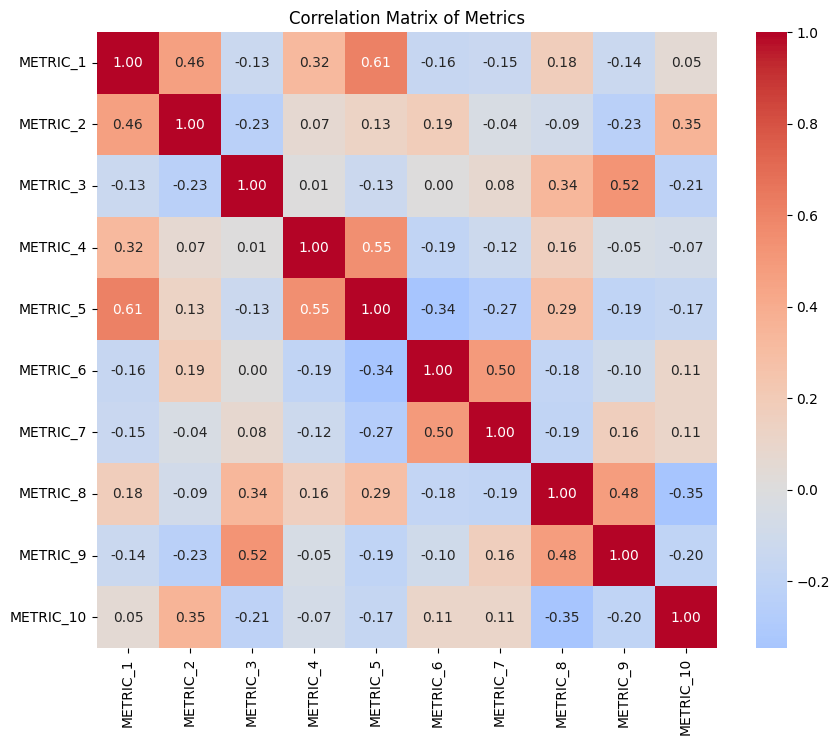

In [19]:
corr, fig = metric_correlations(clean_df)
fig

In [20]:
top_perf.head(10)

,ATTRIBUTE_2,ATTRIBUTE_3,avg_sales_revenue,avg_profit_margin,performance_score
75,A9,GROUP_56,12751.69,0.31,3953.0239
88,AA11,GROUP_27,30767.08,0.10,3076.7080
87,AA11,GROUP_1,41484.12,0.05,2074.2060
98,AA13,GROUP_29,85198.41,0.02,1703.9682
67,A7,GROUP_69,16428.04,0.10,1642.8040
81,AA10,GROUP_23,9622.07,0.14,1347.0898
41,A16,GROUP_63,10520.45,0.11,1157.2495
22,A13,GROUP_53,7838.04,0.14,1097.3256
95,AA12,GROUP_34,10920.31,0.09,982.8279
89,AA11,GROUP_29,32177.02,0.03,965.3106


* Top performers show high sales revenue often paired with lower profit margins, indicating a volume-driven strategy (e.g., AA13 in GROUP_29 with $85k revenue but 2% margin). 
* Conversely, some groups balance moderate sales with higher margins (e.g., A9 in GROUP_56, $12.7k revenue at 31% margin). 
* Performance score reflects this tradeoff between revenue and margin across product categories and regions.

In [ ]:
filtered_df = clean_df[(clean_df['ATTRIBUTE_2'] == 'A9') * (clean_df['ATTRIBUTE_3'] == 'GROUP_56')] 
print(filtered_df['ATTRIBUTE_1'].value_counts())

In [21]:
bottom_perf.head(10)

,ATTRIBUTE_2,ATTRIBUTE_3,avg_sales_revenue,avg_profit_margin,performance_score
39,A16,GROUP_16,2.89,0.01,0.0289
79,A9,GROUP_9,66.92,0.08,5.3536
57,A4,GROUP_46,50.41,0.14,7.0574
37,A15,GROUP_73,79.21,0.11,8.7131
6,A10,GROUP_36,174.24,0.08,13.9392
21,A13,GROUP_49,54.76,0.27,14.7852
11,A11,GROUP_32,101.44,0.18,18.2592
18,A12,GROUP_68,98.88,0.20,19.7760
76,A9,GROUP_71,80.32,0.26,20.8832
53,A3,GROUP_44,288.03,0.08,23.0424


* Lower performers have much smaller sales revenue but sometimes higher profit margins, indicating niche or premium segments (e.g., A2 in GROUP_49 with $57.76 revenue and 79% margin).
* Some groups show modest sales with moderate margins, balancing volume and profitability (e.g., A15 in GROUP_38 with $166.41 revenue at 23% margin).
* Performance scores are generally low, reflecting limited scale or market reach.

In [34]:
filtered_df = clean_df[(clean_df['ATTRIBUTE_2'] == 'A16') * (clean_df['ATTRIBUTE_3'] == 'GROUP_16')] 
print(filtered_df['ATTRIBUTE_1'].value_counts())

ATTRIBUTE_1
0    1
Name: count, dtype: int64


# Demo


In [167]:
import pandas as pd
from pathlib import Path
import yaml

#used for deployment, not needed in notebook env
# from src.preprocessing import preprocess_dataset
# from src.eda import analyze_dataset, metric_analysis, summary_statistics, detect_outliers
# from src.analysis import metric_correlations, sales_and_margin_analysis

# Load paths from config.yaml
with open("config.yaml") as f:
    paths = yaml.safe_load(f)["paths"]

def main():
    # Preprocess
    df = preprocess_dataset(paths["raw_data"], paths["processed_data"])

    # Create EDA results folder
    eda_results_dir = Path(paths["eda_results"]).parent
    eda_results_dir.mkdir(parents=True, exist_ok=True)

    # Run EDA functions and save outputs
    analyze_dataset(df).to_csv(eda_results_dir / "dataset_analysis.csv", index=False)
    metric_analysis(df).to_csv(eda_results_dir / "metric_analysis.csv", index=False)
    summary_statistics(df).to_csv(eda_results_dir / "summary_statistics.csv", index=False)
    detect_outliers(df).to_csv(eda_results_dir / "outliers.csv", index=False)

    # Create Analysis results folder
    analysis_results_dir = Path(paths["analysis_results"]).parent
    analysis_results_dir.mkdir(parents=True, exist_ok=True)

    # Run analysis functions and save outputs
    metric_correlations(
        df,
        output_csv=analysis_results_dir / "correlation_matrix.csv",
        output_fig=Path(paths["correlation_plot"])
    )
    sales_and_margin_analysis(df, output_dir=analysis_results_dir)

if __name__ == "__main__":
    main()


In [168]:
top = pd.read_csv("Results/analysis/top_performers.csv")
display(top)

,ATTRIBUTE_2,ATTRIBUTE_3,avg_sales_revenue,avg_profit_margin,performance_score
0,A9,GROUP_56,12751.69,0.31,3953.0239
1,AA11,GROUP_27,30767.08,0.10,3076.7080
2,AA11,GROUP_1,41484.12,0.05,2074.2060
3,AA13,GROUP_29,85198.41,0.02,1703.9682
4,A7,GROUP_69,16428.04,0.10,1642.8040
...,...,...,...,...,...
117,A10,GROUP_36,174.24,0.08,13.9392
118,A15,GROUP_73,79.21,0.11,8.7131
119,A4,GROUP_46,50.41,0.14,7.0574
120,A9,GROUP_9,66.92,0.08,5.3536
